# Que tal ahora LSTM (Long-Short Term Memory)

## Code Structure:
Here's a simplified example of using Keras (a high-level neural networks API) to create an LSTM model and perform time series forecasting in Python:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("EEZ_Fishing_Hours.xlsx",parse_dates=True)

In [3]:
data["label"].unique()

array(['Fiji', 'Micronesia', 'Gilbert Islands', 'Line Group',
       'Phoenix Group', 'Marshall Islands', 'Nauru', 'Palau',
       'Papua New Guinea', 'Solomon Islands', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Samoa'], dtype=object)

In [4]:
data["ym"],data["date"]=pd.to_datetime(data["ym"]),pd.to_datetime(data["date"])

In [5]:
Micronesia=data[data["label"]=="Micronesia"]

In [6]:
Micronesia

,Unnamed: 0,date,ym,geartype,hours,vesselIDs,iso3,label
299,299,2015-01-01,2015-01-01,drifting_longlines,5503.613333,16,FSM,Micronesia
300,300,2015-01-01,2015-01-01,pole_and_line,1342.647500,9,FSM,Micronesia
301,301,2015-01-01,2015-01-01,tuna_purse_seines,1268.013889,38,FSM,Micronesia
302,302,2015-02-01,2015-02-01,drifting_longlines,5129.236111,13,FSM,Micronesia
303,303,2015-02-01,2015-02-01,pole_and_line,817.969167,12,FSM,Micronesia
...,...,...,...,...,...,...,...,...
647,647,2023-09-01,2023-09-01,fishing,20.634444,1,FSM,Micronesia
648,648,2023-09-01,2023-09-01,tuna_purse_seines,220.361667,9,FSM,Micronesia
649,649,2023-10-01,2023-10-01,drifting_longlines,4774.435000,20,FSM,Micronesia
650,650,2023-10-01,2023-10-01,fishing,17.611944,1,FSM,Micronesia


In [7]:
Micronesia=Micronesia.set_index("date")

In [8]:
y=Micronesia["hours"]

In [9]:
# Decompose the time series
y=y.resample("M").sum()
# The term bfill means that we use the value before filling in missing values
y=y.fillna(method='ffill')

<AxesSubplot: xlabel='date'>

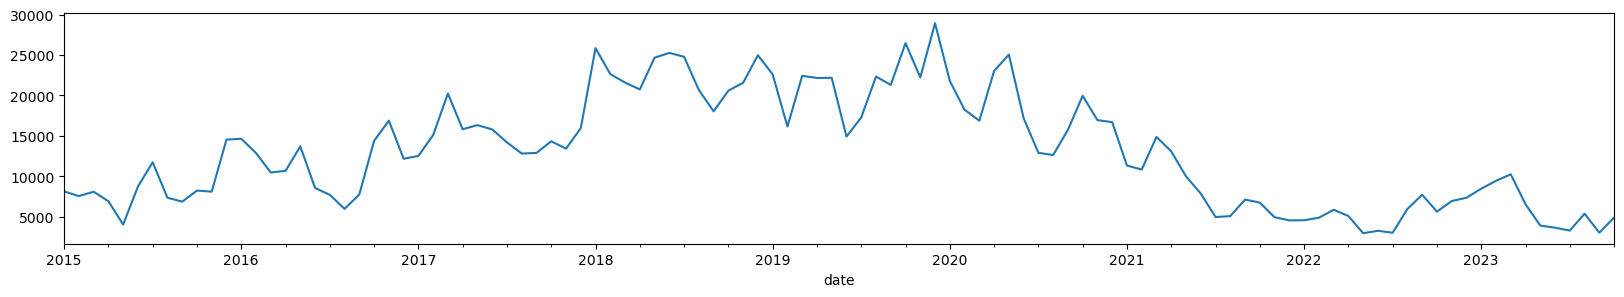

In [10]:
y.plot(figsize=(20,3))

/tmp/ipykernel_31325/2810463284.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<AxesSubplot: xlabel='hours', ylabel='Density'>

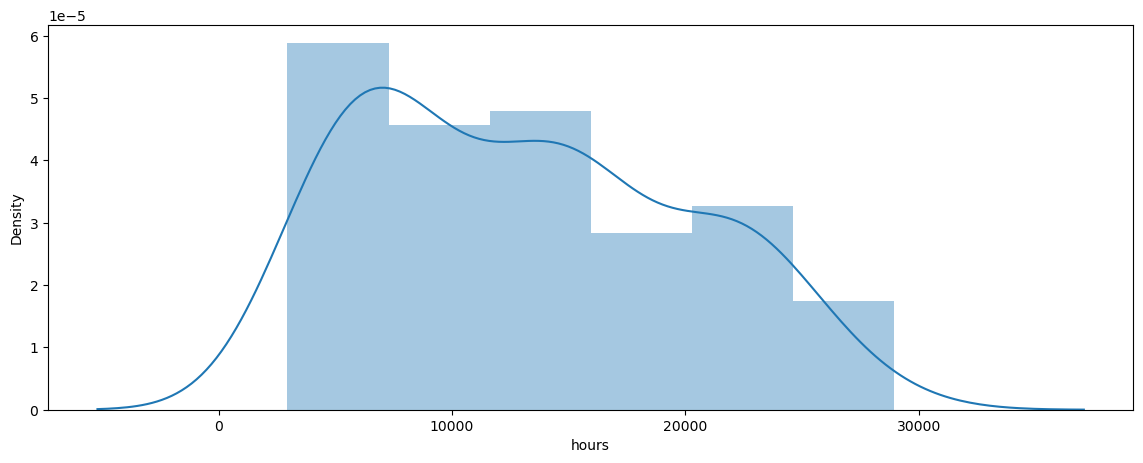

In [11]:
import seaborn as sns
plt.figure(figsize = (14,5))
sns.distplot(y)

<AxesSubplot: xlabel='date', ylabel='hours'>

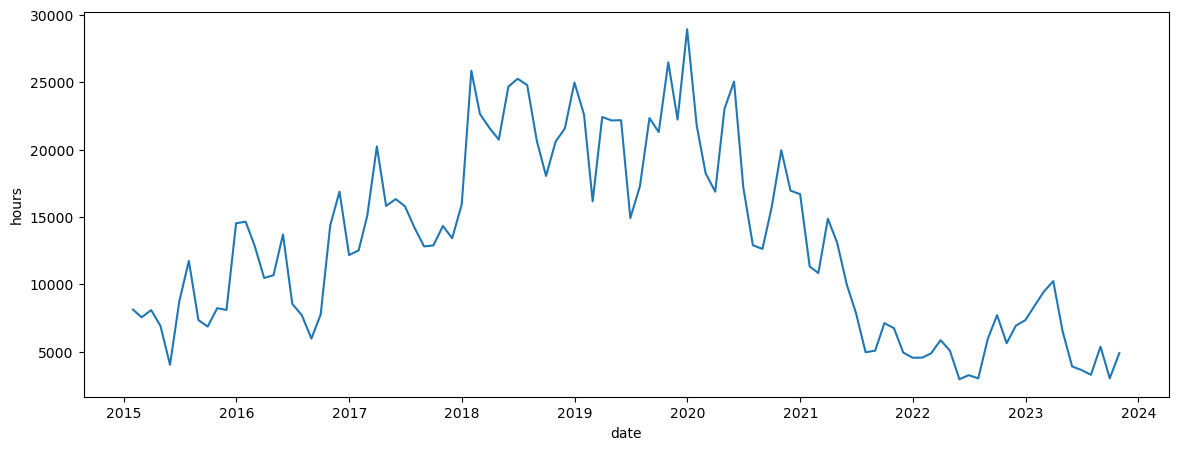

In [12]:
plt.figure(figsize = (14,5))
sns.lineplot(y)

In [13]:
def Sequential_Input_LSTM(df, input_sequence):
    df_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_np) - input_sequence):
        row = [a for a in df_np[i:i + input_sequence]]
        X.append(row)
        label = df_np[i + input_sequence]
        y.append(label)
        
    return np.array(X), np.array(y)

n_input = 10      
df_min_model_data = y
X, y = Sequential_Input_LSTM(df_min_model_data, n_input)

In [14]:
# Training data
X_train, y_train = X[:60], y[:60]

# Validation data
X_val, y_val = X[60:70], y[60:70]

# Test data
X_test, y_test = X[70:], y[70:]

In [15]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam 

2023-11-15 09:01:49.729458: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-15 09:01:49.731047: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 09:01:49.759895: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 09:01:49.759920: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 09:01:49.759938: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [16]:
n_features = 1                        

model1 = Sequential()

model1.add(InputLayer((n_input,n_features)))
model1.add(LSTM(100, return_sequences = True))     
model1.add(LSTM(100, return_sequences = True))
model1.add(LSTM(50))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.summary()

2023-11-15 09:01:52.265529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-15 09:01:52.265811: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 8)                 408       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 151817 (593.04 KB)
Trainable params: 151817 (593.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

model1.compile(loss = MeanSquaredError(), 
               optimizer = Adam(learning_rate = 0.0001), 
               metrics = RootMeanSquaredError())

model1.fit(X_train, y_train, 
           validation_data = (X_val, y_val), 
           epochs = 50, 
           callbacks = [early_stop])

Epoch 1/50
2/2 [==============================] - 4s 754ms/step - loss: 335675104.0000 - root_mean_squared_error: 18321.4375 - val_loss: 141400960.0000 - val_root_mean_squared_error: 11891.2139
Epoch 2/50
2/2 [==============================] - 0s 37ms/step - loss: 335672832.0000 - root_mean_squared_error: 18321.3770 - val_loss: 141399568.0000 - val_root_mean_squared_error: 11891.1553
Epoch 3/50
2/2 [==============================] - 0s 38ms/step - loss: 335670624.0000 - root_mean_squared_error: 18321.3164 - val_loss: 141398112.0000 - val_root_mean_squared_error: 11891.0938
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 335668320.0000 - root_mean_squared_error: 18321.2539 - val_loss: 141396640.0000 - val_root_mean_squared_error: 11891.0322
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 335666176.0000 - root_mean_squared_error: 18321.1953 - val_loss: 141395296.0000 - val_root_mean_squared_error: 11890.9756
Epoch 6/50
2/2 [==================

<AxesSubplot: >

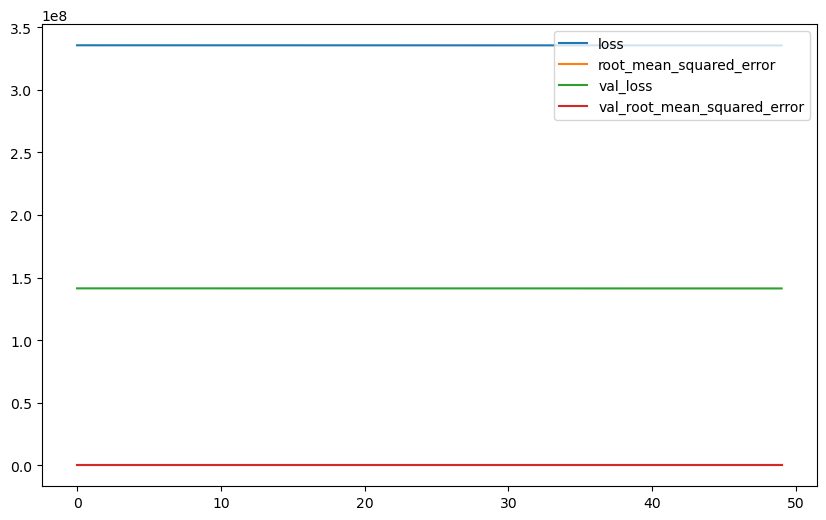

In [18]:
losses_df1 = pd.DataFrame(model1.history.history)

losses_df1.plot(figsize = (10,6))

In [19]:
test_predictions1 = model1.predict(X_test).flatten()


X_test_list = []
for i in range(len(X_test)):
    X_test_list.append(X_test[i][0])
    

test_predictions_df1 = pd.DataFrame({'X_test':list(X_test_list), 
                                    'LSTM Prediction':list(test_predictions1)})

1/1 [==============================] - 1s 719ms/step


In [20]:
test_predictions_df1

,X_test,LSTM Prediction
0,16942.956944,2.652225
1,16685.298518,2.652212
2,11316.744045,2.652200
3,10825.077176,2.652187
4,14860.716972,2.652172
5,13074.276675,2.652145
6,9984.309553,2.652104
7,7853.926422,2.652035
8,4948.332735,2.651894
9,5064.984722,2.651949


- https://medium.com/@vineet.pandya/use-tensorflow-lstm-for-time-series-forecasting-770ec789d2ce

- https://github.com/Vineet214/TimeSeriesForecasting-LSTM?source=post_page-----770ec789d2ce--------------------------------